# CSC401/485 F24 Tutorial - Introduction to Pytorch

By Gavin Guan. Based on tutorial created by Frank Niu, Zhewei Sun.

## About Pytorch

We will be using PyTorch 2.3.0 for this assignment.
This version has been pre-installed on teach.cs with Python 3.12.
To invoke Python 3.12, use the command `python3.12` instead of `python` when running your code.


**Useful Links:**

- PyTorch documentation: https://pytorch.org/docs/2.3/
- Eionps: https://einops.rocks/

In [126]:
import torch

### Overview

In essense, PyTorch is a Python based deep learning package that allows you to specify, train, and execute your own neural networks efficiently.

A complete PyTorch program typically involve the following steps:

0. Prepare your data and specify your neural network.
1. Load a (batch of) datapoint(s) (i.e. dataloader).
2. Pass the datapoint(s) into your neural network (i.e. forward pass).
3. Compute loss based on the neural network's output.
4. Back-propagate error and adjust weights of the neural network (i.e. backward pass).

A package like PyTorch trivializes back-prop with a powerful auto-differentiation engine.


## 1. Working with PyTorch Tensors

### 1.1 Creating Tensors

A **tensor** is basically a PyTorch object that stores your data:

In [127]:
my_tensor = torch.tensor([[1,2], [3,4], [5,6]], dtype=torch.float32)
my_tensor

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

Similar to numpy, you can create pre-populated tensors:


In [128]:
print(torch.ones((3,4)))
print(torch.zeros((2,4)))
print(torch.arange(6).view(2, 3))

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0, 1, 2],
        [3, 4, 5]])


### 1.2 Tensor Attributes

In [129]:
my_tensor

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

**.size()** or **.shape** returns the size of the tensor:

In [131]:
print(f"{my_tensor.size()=}")
print(f"{my_tensor.shape=}")
print(f"{my_tensor.size()[0]=}")
print(f"{my_tensor.size(1)=}")

my_tensor.size()=torch.Size([3, 2])
my_tensor.shape=torch.Size([3, 2])
my_tensor.size()[0]=3
my_tensor.size(1)=2


**.dim()** returns the number of dimensions your tensor has

**.dtype** tells you the type of the data stored within the tensor

In [133]:
print(f"{my_tensor.dim()=}")
print(f"{my_tensor.dtype=}")

my_tensor.dim()=2
my_tensor.dtype=torch.float32


**.requires_grad** tells you whether the tensor is expected receive back-propagated gradient. You can set this to true by specifying *requires_grad=True* in the constructor.

In [134]:
my_tensor.requires_grad

False

In [135]:
my_tensor = torch.tensor([[1,2], [3,4], [5,6]], dtype=torch.float32, requires_grad=True)

In [136]:
my_tensor.requires_grad

True

In [137]:
my_tensor

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]], requires_grad=True)

**.device** tells you which device memory the tensor sits in. This can also be specified when constructing the tensor.

In [141]:
my_tensor.device

device(type='cuda', index=0)

In [139]:
#device = torch.device('cpu')
### Try this if you have a gpu.
### The number after the colon specifies which gpu to use (if you're fortunate enough to have more than 1, that is).
device = torch.device('cuda:0')

In [140]:
my_tensor = torch.tensor([[1,2], [3,4], [5,6]], dtype=torch.float32, requires_grad=True, device=device)

Use **.to** to explicitly send a tensor to a specific device:

In [142]:
my_tensor = my_tensor.to(device)

### 1.3 Tensor Operations

In [149]:
tensor_a = torch.tensor([[1,2], [3,4]], dtype=torch.float32, requires_grad=True)
tensor_b = torch.tensor([[[.5, .6], [.7, .8]]], dtype=torch.float32, requires_grad=True)

You can apply arithmetic operations to tensors just like numpy arrays:

In [150]:
tensor_a + tensor_b

tensor([[[1.5000, 2.6000],
         [3.7000, 4.8000]]], grad_fn=<AddBackward0>)

Notice how the tensor keeps track of extra information because we need the gradients to be back-propogated.

In [151]:
tensor_a * 2

tensor([[2., 4.],
        [6., 8.]], grad_fn=<MulBackward0>)

Applying the * operator to two tensors does an element-wise multiplication:

In [152]:
tensor_a * tensor_b

tensor([[[0.5000, 1.2000],
         [2.1000, 3.2000]]], grad_fn=<MulBackward0>)

### 1.4 Tensor Functions

Use **torch.matmul** for matrix multiplication:

In [154]:
torch.matmul(tensor_a, tensor_b)

tensor([[[1.9000, 2.2000],
         [4.3000, 5.0000]]], grad_fn=<CloneBackward0>)

Most of the tensor functions can be called either as a torch function `function(a, b)`, or a tensor method `a.function(b)`.

In [155]:
tensor_a.matmul(tensor_b)

tensor([[[1.9000, 2.2000],
         [4.3000, 5.0000]]], grad_fn=<CloneBackward0>)

`@` is a valid shorthand for **matmul**.

In [156]:
tensor_a @ tensor_b

tensor([[[1.9000, 2.2000],
         [4.3000, 5.0000]]], grad_fn=<CloneBackward0>)

**torch.sum** sums up the tensor:

In [157]:
my_tensor


tensor([[1., 2.],
        [3., 4.],
        [5., 6.]], device='cuda:0', requires_grad=True)

In [158]:
torch.sum(my_tensor)

tensor(21., device='cuda:0', grad_fn=<SumBackward0>)

In [159]:
my_tensor.sum()

tensor(21., device='cuda:0', grad_fn=<SumBackward0>)

You can specify the *axis* parameter to only sum up a particular dimension:

In [162]:
print(f"{torch.sum(my_tensor, dim=0)=}")
print(f"{torch.sum(my_tensor, axis=1)=}")

torch.sum(my_tensor, dim=0)=tensor([ 9., 12.], device='cuda:0', grad_fn=<SumBackward1>)
torch.sum(my_tensor, axis=1)=tensor([ 3.,  7., 11.], device='cuda:0', grad_fn=<SumBackward1>)


In [163]:
torch.sum(my_tensor, axis=1)

tensor([ 3.,  7., 11.], device='cuda:0', grad_fn=<SumBackward1>)

More basic functions:

In [164]:
my_tensor

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]], device='cuda:0', requires_grad=True)

In [165]:
torch.min(my_tensor)

tensor(1., device='cuda:0', grad_fn=<MinBackward1>)

In [166]:
torch.max(my_tensor, axis=1)

torch.return_types.max(
values=tensor([2., 4., 6.], device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([1, 1, 1], device='cuda:0'))

In [167]:
torch.argmin(my_tensor)

tensor(0, device='cuda:0')

In [168]:
torch.argmax(my_tensor, axis=1)

tensor([1, 1, 1], device='cuda:0')

Note how gradient is not tracked after applying the two non-differentiable functions above.

In [169]:
torch.mean(my_tensor, axis=0)

tensor([3., 4.], device='cuda:0', grad_fn=<MeanBackward1>)

In [170]:
torch.std(my_tensor)

tensor(1.8708, device='cuda:0', grad_fn=<StdBackward0>)

**torch.topk** returns only the top-k elements in the specifed dimension:

In [172]:
t = torch.tensor([[100,2,3], [4,5,6], [7,8,9]])

In [173]:
t

tensor([[100,   2,   3],
        [  4,   5,   6],
        [  7,   8,   9]])

For each row, grab the top 2 elements in each column:

In [174]:
a, _ = torch.topk(t, k=2, dim=1)

For each column, grab the top 2 elements in each row:

In [176]:
torch.topk(t, k=2, dim=0)

torch.return_types.topk(
values=tensor([[100,   8,   9],
        [  7,   5,   6]]),
indices=tensor([[0, 2, 2],
        [2, 1, 1]]))

### 1.5 Slicing and Indexing

A few ways to slice/index a PyTorch tensor:

In [177]:
my_tensor

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]], device='cuda:0', requires_grad=True)

Grab the first row:

In [178]:
my_tensor[0, :]

tensor([1., 2.], device='cuda:0', grad_fn=<SliceBackward0>)

Get the second element of the last two rows:

In [179]:
my_tensor[-2:, 1]

tensor([4., 6.], device='cuda:0', grad_fn=<SelectBackward0>)

You can also use a integer tensor to index another tensor:

In [184]:
a = torch.tensor([0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 2.2])
b = torch.tensor([0, 1,3,1])

In [181]:
a[b]

tensor([0.0000, 1.1000, 3.3000, 1.1000])

In [185]:
a > 3

tensor([False, False, False,  True,  True,  True, False])

We can find all elements that are greater than 3 and assign them to zero:

In [186]:
a[a>3] = 0
a

tensor([0.0000, 1.1000, 2.2000, 0.0000, 0.0000, 0.0000, 2.2000])

Here t>3 creates a **mask** tensor:

In [187]:
a = torch.tensor([0.0, 1.1, 2.2, 3.3, 4.4, 5.5, 2.2])
print(a>3)

tensor([False, False, False,  True,  True,  True, False])


Grab all rows that have a sum greater than 5:

In [191]:
print(my_tensor)
my_tensor[:, my_tensor.sum(axis=0) > 10]

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]], device='cuda:0', requires_grad=True)


tensor([[2.],
        [4.],
        [6.]], device='cuda:0', grad_fn=<IndexBackward0>)

In [195]:
my_tensor[:]

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]], device='cuda:0', grad_fn=<SliceBackward0>)

In [192]:
print(my_tensor)
my_tensor[my_tensor.sum(axis=1) > 5]

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]], device='cuda:0', requires_grad=True)


tensor([[3., 4.],
        [5., 6.]], device='cuda:0', grad_fn=<IndexBackward0>)

### 1.6 Broadcasting

Sometimes, you can perform operations on tensors of different size via broadcasting. Two tensors can be broadcasted when:
- Each tensor has at least one dimension.
- When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be:
  - equal
  - one of them is 1
  - one of them does not exist.

In [196]:
t = torch.arange(4)

In [198]:
print(t)
print(t + torch.tensor([100]))

tensor([0, 1, 2, 3])
tensor([100, 101, 102, 103])


Here, we are implicitly broadcasting *tensor([100])*.

In [199]:
tensor_2_4 = torch.tensor([[1,2,3,4], [5,6,7,8]], dtype=torch.float32, requires_grad=True)
tensor_4_2 = torch.tensor([[1,2], [3,4], [5,6], [7,8]], dtype=torch.float32, requires_grad=True)
tensor_4 = torch.tensor([.1, .2, .3, .4], dtype=torch.float32, requires_grad=True)

In [200]:
print(f"{tensor_2_4.shape=}", tensor_2_4, '', sep='\n')
print(f"{tensor_4_2.shape=}", tensor_4_2, '', sep='\n')

print(f"{tensor_4.shape=}", tensor_4, sep='\n')

tensor_2_4.shape=torch.Size([2, 4])
tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]], requires_grad=True)

tensor_4_2.shape=torch.Size([4, 2])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]], requires_grad=True)

tensor_4.shape=torch.Size([4])
tensor([0.1000, 0.2000, 0.3000, 0.4000], requires_grad=True)


Tensor 2_4 and 4 can be combined because their trailing dimension sizes match:

In [201]:
tensor_2_4 + tensor_4
# size [2, 4] + size [4], okay

tensor([[1.1000, 2.2000, 3.3000, 4.4000],
        [5.1000, 6.2000, 7.3000, 8.4000]], grad_fn=<AddBackward0>)

Trying to add any of the other combinations will result in an error:

In [ ]:
try:
  tensor_2_4 + tensor_4_2
  # size [2, 4] + size [4, 2], error
except Exception as e:
  print(type(e).__name__, ":", e)

RuntimeError : The size of tensor a (4) must match the size of tensor b (2) at non-singleton dimension 1


In [ ]:
try:
  tensor_4_2 + tensor_4
  # size [4, 2] + size [4], error
except Exception as e:
  print(type(e).__name__, ":", e)

RuntimeError : The size of tensor a (2) must match the size of tensor b (4) at non-singleton dimension 1


You can introduce new dimensions to the existing tensor to make broadcasting possible

In [ ]:
print(f"{tensor_4.shape=}")
print(f"{tensor_4.unsqueeze(0).shape=}")
print(f"{tensor_4.unsqueeze(1).shape=}")

tensor_4.shape=torch.Size([4])
tensor_4.unsqueeze(0).shape=torch.Size([1, 4])
tensor_4.unsqueeze(1).shape=torch.Size([4, 1])


In [202]:
tensor_test1 = torch.arange(12).view(2, 2, 3)
tensor_test2 = torch.arange(6).view(2,3)

In [203]:
print(tensor_test1, tensor_test2, sep="\n")

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]])
tensor([[0, 1, 2],
        [3, 4, 5]])


In [204]:
tensor_test1 + tensor_test2[:, None, :]

tensor([[[ 0,  2,  4],
         [ 3,  5,  7]],

        [[ 9, 11, 13],
         [12, 14, 16]]])

In [205]:
tensor_test1 + tensor_test2[None, :, :]

tensor([[[ 0,  2,  4],
         [ 6,  8, 10]],

        [[ 6,  8, 10],
         [12, 14, 16]]])

In [ ]:
result = tensor_4_2 + tensor_4.unsqueeze(1)
# size [4, 2] + size [4, 1], okay
result.shape

torch.Size([4, 2])

In [215]:
t = torch.arange(6).view(2,3)
t

tensor([[0, 1, 2],
        [3, 4, 5]])

In [216]:
torch.arange(6).view(-1, 2)

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [210]:
t.unsqueeze(2).size()

torch.Size([2, 3, 1])

In [ ]:
print(f"{tensor_4_2.shape=}")
print(f"{tensor_4_2.unsqueeze(0).shape=}")
print(f"{tensor_4_2.unsqueeze(1).shape=}")
print(f"{tensor_4_2.unsqueeze(2).shape=}")
print(f"{tensor_4_2.unsqueeze(-3).shape=}")
print(f"{tensor_4_2.unsqueeze(-2).shape=}")
print(f"{tensor_4_2.unsqueeze(-1).shape=}")

tensor_4_2.shape=torch.Size([4, 2])
tensor_4_2.unsqueeze(0).shape=torch.Size([1, 4, 2])
tensor_4_2.unsqueeze(1).shape=torch.Size([4, 1, 2])
tensor_4_2.unsqueeze(2).shape=torch.Size([4, 2, 1])
tensor_4_2.unsqueeze(-3).shape=torch.Size([1, 4, 2])
tensor_4_2.unsqueeze(-2).shape=torch.Size([4, 1, 2])
tensor_4_2.unsqueeze(-1).shape=torch.Size([4, 2, 1])


### 1.7 Tensor Manipulation

**.view** allows you change the shape of the tensor w/o changing the underlying data:

In [211]:
print(tensor_2_4.shape, tensor_2_4, sep='\n')

torch.Size([2, 4])
tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]], requires_grad=True)


In [ ]:
print(tensor_2_4.view((4,2)).shape, tensor_2_4.view((4,2)), sep='\n')

torch.Size([4, 2])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]], grad_fn=<ViewBackward0>)


We can add the two tensors now that they are the same shape:

In [ ]:
print(tensor_2_4.view((4,2)).shape, tensor_4_2.shape, sep='\t')
print(tensor_2_4.view((4,2)) + tensor_4_2)

torch.Size([4, 2])	torch.Size([4, 2])
tensor([[ 2.,  4.],
        [ 6.,  8.],
        [10., 12.],
        [14., 16.]], grad_fn=<AddBackward0>)


You can also use -1 to let PyTorch figure out the dimension for you:

In [ ]:
tensor_2_4.view((-1,2)) # total 8 elements, so -1, 2 is equivalent to 4, 2

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]], grad_fn=<ViewBackward0>)

In [217]:
tensor_2_4.view(-1)

tensor([1., 2., 3., 4., 5., 6., 7., 8.], grad_fn=<ViewBackward0>)

In [218]:
print(torch.flatten(tensor_2_4))
print(tensor_2_4.flatten())

tensor([1., 2., 3., 4., 5., 6., 7., 8.], grad_fn=<ViewBackward0>)
tensor([1., 2., 3., 4., 5., 6., 7., 8.], grad_fn=<ViewBackward0>)


**torch.cat** concatenates two tensors along the specified dimension:

In [ ]:
tensor_4_2_new = tensor_2_4.view((4,2)) * 0.1

In [ ]:
print(tensor_4_2_new.shape, tensor_4_2.shape, sep='\t')

torch.Size([4, 2])	torch.Size([4, 2])


In [219]:
# 4x2, 4x2 -> 8x2
print(torch.cat([tensor_4_2_new, tensor_4_2], dim=0))

tensor([[0.1000, 0.2000],
        [0.3000, 0.4000],
        [0.5000, 0.6000],
        [0.7000, 0.8000],
        [1.0000, 2.0000],
        [3.0000, 4.0000],
        [5.0000, 6.0000],
        [7.0000, 8.0000]], grad_fn=<CatBackward0>)


In [220]:
# 4x2, 4x2 -> 4x4
print(torch.cat([tensor_4_2_new, tensor_4_2], dim=1))

tensor([[0.1000, 0.2000, 1.0000, 2.0000],
        [0.3000, 0.4000, 3.0000, 4.0000],
        [0.5000, 0.6000, 5.0000, 6.0000],
        [0.7000, 0.8000, 7.0000, 8.0000]], grad_fn=<CatBackward0>)


Note that the tensor dimensions must match along the non-specified dimension. Otherwise, it will throw an error like this:

In [ ]:
try:
  torch.cat([tensor_2_4, tensor_4_2], dim=1)
  # 2x4, 4x2 -> error
except Exception as e:
  print(type(e).__name__, ":", e)

RuntimeError : Sizes of tensors must match except in dimension 1. Expected size 2 but got size 4 for tensor number 1 in the list.


Similarly, **torch.stack** stack a list of tensors (with the same sizes) along a new dimension.

In [ ]:
torch.stack([torch.zeros(3), torch.ones(3), torch.ones(3)+1])

tensor([[0., 0., 0.],
        [1., 1., 1.],
        [2., 2., 2.]])

In [225]:
torch.cat([torch.zeros((2,3)), torch.ones((2,3)), torch.ones((1,3))+1], dim=0).size()

torch.Size([5, 3])

In [223]:
torch.stack([torch.zeros((2,3)), torch.ones((2,3)), torch.ones((2,3))+1]).size()

torch.Size([3, 2, 3])

In [ ]:
print(torch.cat([torch.zeros(3), torch.ones(3), torch.ones(3)+1]))
print(torch.cat([torch.zeros(3).unsqueeze(0), torch.ones(3).unsqueeze(0), torch.ones(3).unsqueeze(0)+1]))

tensor([0., 0., 0., 1., 1., 1., 2., 2., 2.])
tensor([[0., 0., 0.],
        [1., 1., 1.],
        [2., 2., 2.]])


## 2. Neural Network Modules

This section will walk you through some neural network modules relevant to the assignment and NLP in general.

### 2.1 Embedding

**torch.nn.Embedding** is essentially a lookup table for your word embeddings. It keeps track of a V\*E matrix where V is your vocabulary size and E is the embedding size.

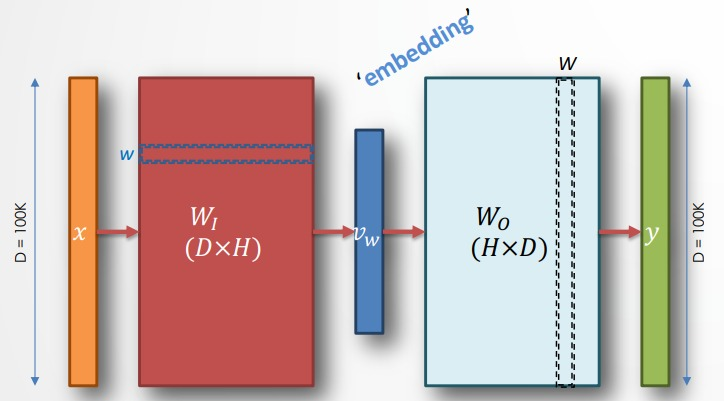

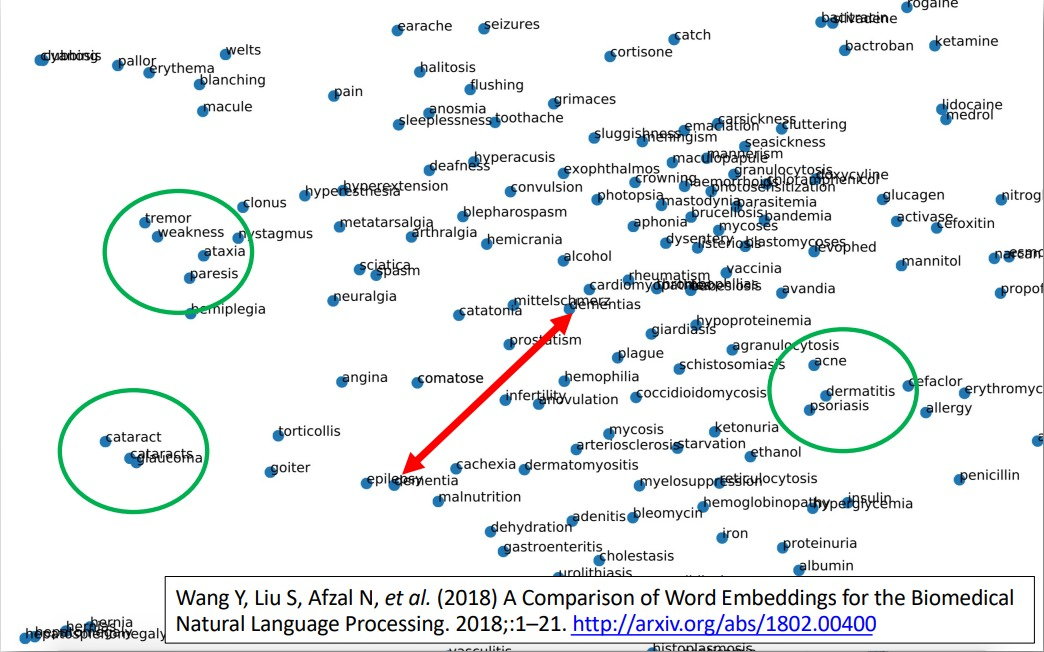

In [227]:
V = 10
E = 300
embeddings = torch.nn.Embedding(V, E)

In [228]:
embeddings

Embedding(10, 300)

Supporse we have pre-processed our sentences into vocabulary indices. We can apply the Embedding object to retrieve the corresponding word embeddings:

In [234]:
sentences = [[1,2,3], [2,9, 0]]
# "a", "b", "c" ....
# ["a b c", "b i 0"]

In [235]:
sent_embeds = embeddings(torch.tensor(sentences))

In [231]:
print(sent_embeds.size())
print(sent_embeds)

torch.Size([2, 3, 300])
tensor([[[-0.0316,  0.9131,  0.4405,  ..., -0.4678, -1.8660, -0.9187],
         [-0.4722,  0.4503,  1.4372,  ..., -0.0060,  1.1183,  0.5492],
         [-0.4866,  0.6258, -0.3548,  ...,  2.3163,  0.9172,  0.4411]],

        [[-0.4722,  0.4503,  1.4372,  ..., -0.0060,  1.1183,  0.5492],
         [-0.5420, -1.4728,  0.7822,  ..., -0.0828,  1.5657,  1.1045],
         [-0.5058, -0.5563, -2.3918,  ...,  1.6078,  0.3244, -0.3180]]],
       grad_fn=<EmbeddingBackward0>)


Note that 1) the embeddings have been initialized and 2) how the dimensions are being preserved.

The resulting tensors will also keep track of gradients now:

In [236]:
sent_embeds.requires_grad

True

The embedding module has builtin support for padding. You can specify the `padding_idx` parameter.

In [237]:
embeddings = torch.nn.Embedding(V, E, padding_idx=0)

In [238]:
sent_embeds = embeddings(torch.tensor(sentences))
sent_embeds
# recall sentences = [[1,2,3], [2,9,0]]

tensor([[[ 0.6862, -2.7422, -0.3493,  ...,  0.7484,  0.8227,  0.0409],
         [ 2.0948, -1.3528, -0.6042,  ...,  0.1624,  0.3458,  1.2186],
         [ 0.8304, -0.2158,  1.4036,  ...,  0.0453, -0.5075,  1.3469]],

        [[ 2.0948, -1.3528, -0.6042,  ...,  0.1624,  0.3458,  1.2186],
         [ 0.9032, -1.8423,  2.9078,  ...,  1.5321,  0.9299,  1.6987],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]],
       grad_fn=<EmbeddingBackward0>)

Notice how the last row (the last token of the second sentence) is $\mathbf{0}$.

### 2.2 Linear Layer

**torch.nn.Linear** specifies a fully connected layer. Let's project an embedding to 50 dimensions from 300:

$$y = x W^\top + b$$

In [239]:
linear_layer = torch.nn.Linear(300, 50)

In [ ]:
linear_layer

Linear(in_features=300, out_features=50, bias=True)

In [240]:
projected_embeddings = linear_layer(sent_embeds)

In [241]:
print(sent_embeds.shape, projected_embeddings.shape, sep='\t')

torch.Size([2, 3, 300])	torch.Size([2, 3, 50])


### 2.3 Useful Modules

**torch.nn.functional.relu**

In [ ]:
print(projected_embeddings.min(), projected_embeddings.max(), sep='\t')
print(torch.nn.functional.relu(projected_embeddings).min(), torch.nn.functional.relu(projected_embeddings).max(), sep='\t')

tensor(-1.2725, grad_fn=<MinBackward1>)	tensor(1.6307, grad_fn=<MaxBackward1>)
tensor(0., grad_fn=<MinBackward1>)	tensor(1.6307, grad_fn=<MaxBackward1>)


**torch.nn.Dropout** - *p* specifies the dropout rate:

In [242]:
dropout_layer = torch.nn.Dropout(p=0.9)

In [243]:
dropout_layer(projected_embeddings)

tensor([[[ -0.0000,  -0.0000,  -0.0000,   0.0000,   3.0286,  -0.0000,  -0.0000,
            0.0000,   0.0000,   0.0000,  -0.0000,   0.0000,   0.0000,   0.0000,
           -0.0000,  -0.0000,  -0.0000,  -0.0000,  -0.0000,  -0.0000,  -0.0000,
            0.0000,   0.0000,   0.0000,   0.5835,   0.0000,   0.0000,  -0.0000,
            0.0000,   0.0000,  -0.0000,   0.0000,   0.0000,  -0.0000,   0.0000,
            0.0000,  -0.0000,  -0.0000,   0.0000,  -0.0000,   0.0000,   0.0000,
           -0.0000,  -0.0000,  -0.0000,  -0.0000,  -5.1797,   0.0000,   0.0000,
            0.0000],
         [ -0.0000,  -0.0000,  -0.0000,   0.0000,   0.0000,  -9.2431,  -0.0000,
            0.0000,   0.0000,  -0.0000,  -0.0000,  -0.0000,   0.0000,   0.0000,
            0.0000,   0.0000,   0.0000, -11.1992,   0.0000,  -0.0000,  -0.0000,
            0.0000,  -3.0923,   0.0000,  -0.0000,  -0.0000,  -0.0000,  -0.0000,
           -0.0000,  -0.0000,  -0.0000,   8.1991,   0.0000,   0.0000,  -0.0000,
            0.0000,

Notice how some values are zeroed out.

Call model.eval() to disable dropout, where model is your model class that inherits nn.Module.

### 2.4 Training Loop

Now, let's consider this simple MNIST model.

In [244]:
import torch
from torch.utils.data import DataLoader

import torchvision
import matplotlib.pyplot as plt

# 0.1 Prepare your data
train_data = torchvision.datasets.MNIST(
    root = 'data',
    train = True,
    transform = torchvision.transforms.ToTensor(),
    download=True,
)
test_data = torchvision.datasets.MNIST(
    root = 'data',
    train = False,
    transform = torchvision.transforms.ToTensor()
)

def show_image(dataset, index):
    plt.imshow(dataset[index][0].squeeze(), cmap='gray')
    plt.show()


train_dataloader = DataLoader(train_data, batch_size=100, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=100, shuffle=True)


# 0.2 Specify your neural network

class SimpleModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleModel, self).__init__()

        self.layer_1 = torch.nn.Linear(input_size, hidden_size)
        self.layer_2 = torch.nn.Linear(hidden_size, hidden_size)
        self.layer_3 = torch.nn.Linear(hidden_size, output_size)

        self.relu = torch.nn.ReLU()
        # self.softmax = torch.nn.LogSoftmax(dim=1)

    def forward(self, batch):

        batch = batch.view(batch.shape[0], -1)

        hidden = self.layer_1(batch)
        hidden = self.relu(hidden)
        hidden = self.layer_2(hidden)
        hidden = self.relu(hidden)
        output = self.layer_3(hidden)

        return output

Below is a quick example of how a training iteration works:

In [ ]:
model = SimpleModel(784, 100, 10)

# Set up an optimizer and a loss function
optimizer = torch.optim.Adam(model.parameters())
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
# For each training iteration
for i, (batch, target) in enumerate(train_dataloader):

  # Reset back-proped gradient
  optimizer.zero_grad()

  # Run your model on data
  output = model.forward(batch)

  # Compute loss and back-prop
  loss = loss_fn(output, target)
  loss.backward()

  # Adjust weights
  optimizer.step()

  # Call `loss.item()` to singular value tensor returns its value
  print(f"iteration {i}:", loss.item())


  if i >= 20:
    break

iteration 0: 2.3164162635803223
iteration 1: 2.290942668914795
iteration 2: 2.286985397338867
iteration 3: 2.2663285732269287
iteration 4: 2.247443199157715
iteration 5: 2.2340404987335205
iteration 6: 2.2193119525909424
iteration 7: 2.2141265869140625
iteration 8: 2.1844401359558105
iteration 9: 2.142188310623169
iteration 10: 2.1458661556243896
iteration 11: 2.110956907272339
iteration 12: 2.039005994796753
iteration 13: 2.0035767555236816
iteration 14: 1.971337080001831
iteration 15: 1.8975181579589844
iteration 16: 1.8773837089538574
iteration 17: 1.7911789417266846
iteration 18: 1.8048585653305054
iteration 19: 1.7183837890625
iteration 20: 1.6852025985717773


## 3. Einstein is All You Need: einsum and einop
1. Advanced tools for tensor manipulation.
2. Also suitable for computation.
3. Einsum also available in native numpy and torch.


In [ ]:
import einops

### 3.1 Tensor Shape Manipulation

In [245]:
# einops: reorder
x = torch.randn(10, 64, 64, 3)  # (batch, height, width, channels)
x_reordered = einops.rearrange(x, 'b h w c -> b c h w')
print(x_reordered.shape)  # Output: torch.Size([10, 3, 64, 64])

torch.Size([10, 3, 64, 64])


In [ ]:
# torch: reorder
x = torch.randn(10, 64, 64, 3)
x_reordered = x.permute(0, 3, 1, 2)  # Reorder dimensions
print(x_reordered.shape)  # Output: torch.Size([10, 3, 64, 64])

torch.Size([10, 3, 64, 64])


In [ ]:
# flatten with einops
x = torch.randn(10, 3, 64, 64)  # (batch, channels, height, width)
x_flattened = einops.rearrange(x, 'batch channel height width -> batch channel (height width)')
print(x_flattened.shape)  # Output: torch.Size([10, 3, 4096])

torch.Size([10, 3, 4096])


In [ ]:
# flatten with torch
x = torch.randn(10, 3, 64, 64)
x_flattened = x.view(10, 3, -1)  # Flatten height and width
print(x_flattened.shape)  # Output: torch.Size([10, 3, 4096])

torch.Size([10, 3, 4096])


In [ ]:
# splitting with einops
x = torch.randn(10, 64 * 8)  # (batch, sequence_length * heads)
x_split = einops.rearrange(x, 'b (s h) -> b s h', s=64, h=8)
print(x_split.shape)  # Output: torch.Size([10, 64, 8])

torch.Size([10, 64, 8])


In [ ]:
# splitting with torch
x = torch.randn(10, 64 * 8)
x_split = x.view(10, 64, 8)  # Split the dimensions
print(x_split.shape)  # Output: torch.Size([10, 64, 8])

torch.Size([10, 64, 8])


In [ ]:
# grouping and slicing with einops
# divide a RGB 256 x 256 image to patches of 32x32, flatten the RGB pixel values in each patch
# there are 64 patches in total
x = torch.randn(1, 3, 256, 256)  # (batch, channels, height, width)
# Create patches of size 32x32
patches = einops.rearrange(x, 'b c (h p1) (w p2) -> b (h w) (c p1 p2)', p1=32, p2=32)
print(patches.shape)  # Output: torch.Size([1, 64, 3072])

torch.Size([1, 64, 3072])


### 3.2 Einops for Computation

In [ ]:
# mean reduction with einops
x = torch.randn(10, 64, 64, 3)  # (batch, height, width, channels)
x_reduced = einops.reduce(x, 'b h w c -> b h c', 'mean')
print(x.shape)
print(x_reduced.shape)  # Output: torch.Size([10, 64, 3])

torch.Size([10, 64, 64, 3])
torch.Size([10, 64, 3])


In [ ]:
# mean reduction with torch
x = torch.randn(10, 64, 64, 3)
x_reduced = x.mean(dim=2)  # Reduce over the width dimension
print(x_reduced.shape)  # Output: torch.Size([10, 64, 3])

torch.Size([10, 64, 3])


In [ ]:
# matrix multiplication with einops
A = torch.randn(10, 3, 400)  # (batch, M, K)
B = torch.randn(10, 400, 5)  # (batch, K, N)
C = einops.einsum(A, B, 'b m k, b k n -> b m n')  # Batch matrix multiplication
print(C.shape)  # Output: torch.Size([10, 3, 5])

torch.Size([10, 3, 5])


In [ ]:
# matrix multiplication, flattened
# Initialize the result tensor
C_with_for_loop = torch.zeros(10, 3, 5)  # (batch, M, N)

# Perform batch matrix multiplication using nested for loops
for i in range(A.shape[0]):  # Iterate over the batch dimension
    for m in range(A.shape[1]):  # Iterate over rows of A
        for n in range(B.shape[2]):  # Iterate over columns of B
            sum = 0
            for k in range(A.shape[2]):  # Iterate over the shared dimension
                sum += A[i, m, k] * B[i, k, n]  # Multiply and accumulate
            C_with_for_loop[i, m, n] = sum  # Assign the accumulated sum to the result tensor

In [ ]:
# matrix multiplication with torch
C_torch = torch.bmm(A, B)  # Batch matrix multiplication
print(C_torch.shape)  # Output: torch.Size([10, 3, 5])

torch.Size([10, 3, 5])


In [ ]:
print(torch.allclose(C, C_with_for_loop), torch.allclose(C, C_torch), sep='\t')

True	True


In [ ]:
print((C == C_with_for_loop).all(), (C == C_torch).all(), sep='\t')

tensor(False)	tensor(True)


In [ ]:
print(torch.allclose(torch.tensor([1.0001]), torch.tensor([1.0])))
print(torch.allclose(torch.tensor([1.0001]), torch.tensor([1.0]), atol=0.1))

False
True


### 3.3 Einsum in NumPy and PyTorch

In [ ]:
# prompt: show a few one liner example of the existence of einsum in einops, native numpy and native torch, and show they lead to the same results. Use very small examples such that the result can be printed (the values, not just the shape)
import torch
import numpy as np

# Example tensors
A = torch.arange(6).reshape(2, 3).float()
B = torch.arange(12).reshape(3, 4).float()

# einops
C_einops = einops.einsum(A, B, 'i j, j k -> i k')
print("einops:\n", C_einops)

# numpy
A_np = A.numpy()
B_np = B.numpy()
C_numpy = np.einsum('i j, j k -> i k', A_np, B_np)
print("numpy:\n", C_numpy)

# torch
C_torch = torch.einsum('i j, j k -> i k', A, B)
print("torch:\n", C_torch)


einops:
 tensor([[20., 23., 26., 29.],
        [56., 68., 80., 92.]])
numpy:
 [[20. 23. 26. 29.]
 [56. 68. 80. 92.]]
torch:
 tensor([[20., 23., 26., 29.],
        [56., 68., 80., 92.]])


In [ ]:
einops.rearrange(A, 'first_dimension second_dimension -> second_dimension first_dimension')

tensor([[0., 3.],
        [1., 4.],
        [2., 5.]])